In [8]:
import serial
import serial.tools
import serial.tools.list_ports

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from tqdm import tqdm

# Serial Setup

In [2]:
ports = serial.tools.list_ports.comports()
for port in ports:
    print(f"Port: '{port.device}' - {port.description}")

Port: '/dev/cu.debug-console' - n/a
Port: '/dev/cu.ZihuiAndysPowerbeatsPro' - n/a
Port: '/dev/cu.Bluetooth-Incoming-Port' - n/a
Port: '/dev/cu.usbmodem21401' - IOUSBHostDevice


In [3]:
ser = serial.Serial('/dev/cu.usbmodem21401', 9600, timeout=None)

In [4]:
def get_accelerometer_data():
    ser.reset_input_buffer()
    while True:
        try:
            data = ser.readline().decode('utf-8').strip()
            data_splitted = list(map(int, data.split(',')))
            
            if len(data_splitted) == 3:
                break
        except:
            pass
    return np.array(data_splitted)

# Vector Operations

In [ ]:
def get_magnitude(vec):
    return np.sqrt(np.dot(vec, vec))

In [ ]:
def get_unit_vector(vec):
    return vec / get_magnitude(vec)

In [33]:
def get_angle_btwn_vecs(vec1, vec2):
    vec1_h = get_unit_vector(vec1)
    vec2_h = get_unit_vector(vec2)
    
    return np.arccos(np.dot(vec1_h, vec2_h))

def to_degree(radian):
    return 180 * radian / np.pi

In [65]:
def projection(from_, to):
    to_h = get_unit_vector(to)
    return np.dot(from_, to_h) * to_h

In [83]:
def gram_schmidt(datum, vec):
    return get_unit_vector(vec - projection(vec, datum))

# Vector Visualization

In [21]:
arr = []
for i in range(20):
    entry = get_unit_vector(get_accelerometer_data())
    print(entry)
    arr.append(entry)
    
arr = np.array(arr)

[-0.63461333 -0.03080647  0.77221557]
[-0.63264254 -0.02767259  0.77394938]
[-0.63477106 -0.01925317  0.77246037]
[-0.63406731 -0.02903673  0.7727325 ]
[-0.6206321  -0.24293856  0.74551771]
[0.27427354 0.47786316 0.83451832]
[-0.74633756  0.17585687  0.64191479]
[ 0.64947729 -0.59014233  0.47949064]
[0.14570493 0.84891036 0.50805637]
[-0.16455126 -0.37562845  0.91204504]
[0.1558372  0.4750643  0.86604196]
[ 0.19249151 -0.55565485  0.80882304]
[0.06281301 0.00759599 0.99799641]
[-0.30494213  0.69534756  0.65077036]
[0.32467912 0.33150848 0.88582481]
[-0.18151824 -0.46084942  0.86871683]
[0.2166097  0.63316682 0.74308816]
[-0.06127931 -0.54675117  0.8350497 ]
[ 0.2557523  -0.26647922  0.92928983]
[-0.20142696 -0.40812687  0.89042666]


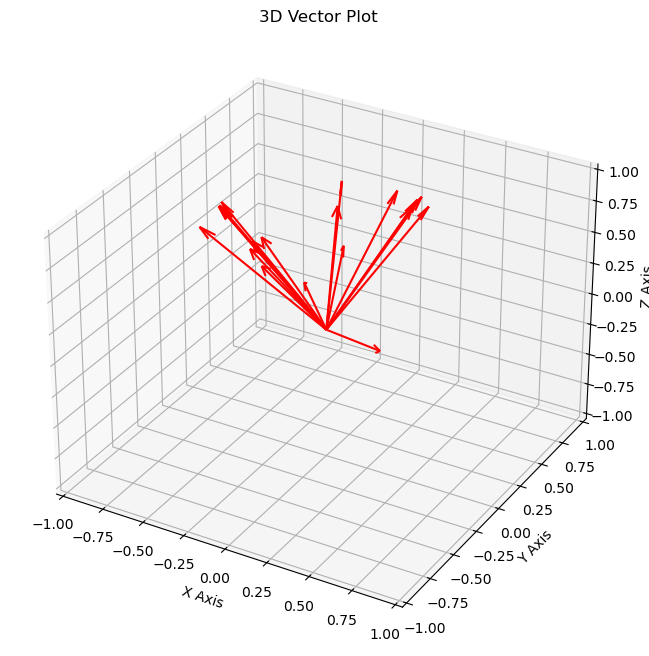

In [25]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

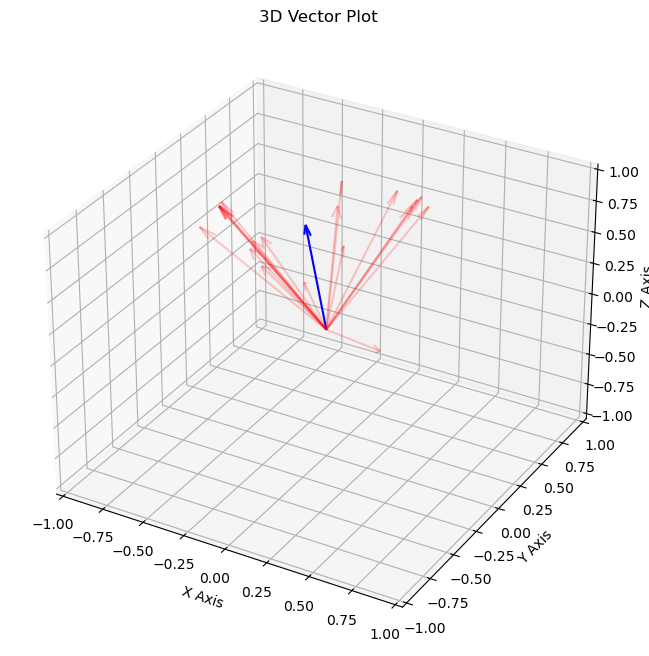

In [30]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1, alpha=0.2)

mean_vec = np.mean(arr, axis=0)
ax.quiver(0, 0, 0, *mean_vec, color='b', arrow_length_ratio=0.1)


# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

# 1 vector datum approach

## Sample the datum

In [12]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1_arr = np.array(datum_1_arr)

100%|██████████| 20/20 [00:09<00:00,  2.03it/s]


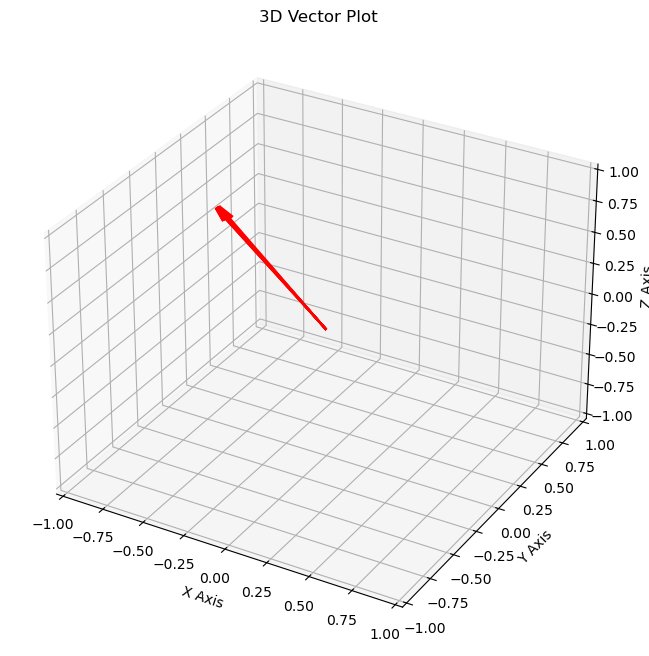

In [31]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

# Plot the vector
for x, y, z in datum_1_arr:
    ax.quiver(0, 0, 0, x, y, z, color='r', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [40]:
datum_1 = np.mean(datum_1_arr, axis=0)
datum_1

array([-0.63951141, -0.03640288,  0.76789165])

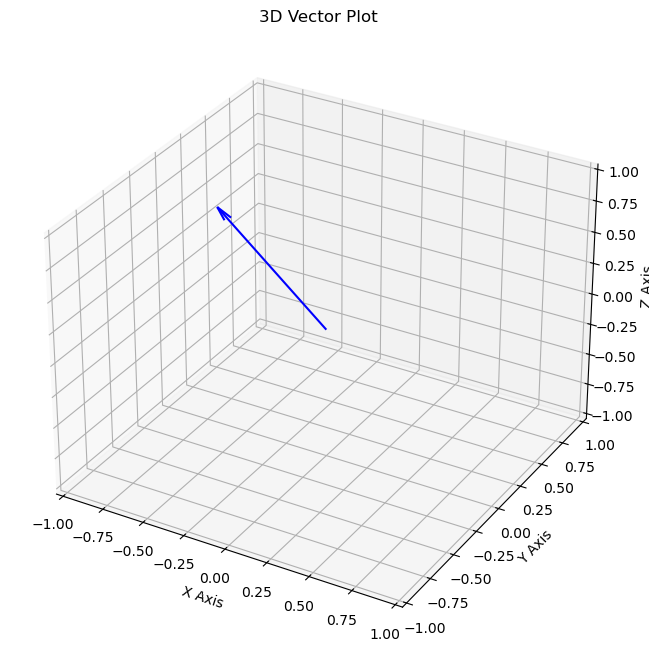

In [42]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get another measurement

In [ ]:
vec = []
for i in tqdm(range(5)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = get_unit_vector(np.mean(np.array(vec), axis=0))
vec

100%|██████████| 5/5 [00:02<00:00,  2.28it/s]


array([ 0.54933675, -0.14991052,  0.82191086])

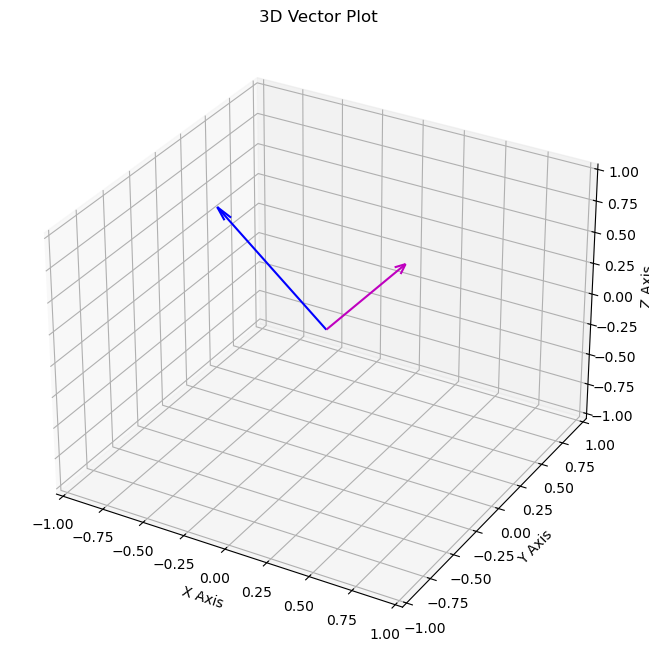

In [57]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [58]:
to_degree(get_angle_btwn_vecs(datum_1, vec))

73.42167826133196

100%|██████████| 5/5 [00:02<00:00,  2.32it/s]


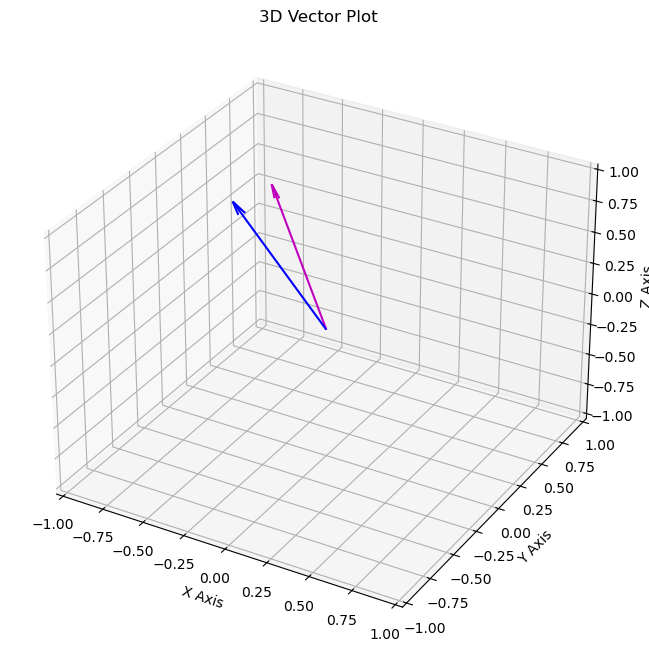

13.931862048880951


In [106]:
vec = []
for i in tqdm(range(5)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = np.mean(np.array(vec), axis=0)
vec
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()
print(to_degree(get_angle_btwn_vecs(datum_1, vec)))

In [ ]:
for i in range(20):
    vec = get_unit_vector(get_accelerometer_data())
    print(f"{vec}\t angle = {to_degree(get_angle_btwn_vecs(datum_1, vec))}")

[ 1.36298765e-04 -4.23616562e-01  9.05841592e-01]	 angle = 44.688799481391015
[-0.5368107  -0.051475    0.84213098]	 angle = 7.316960330542142
[-0.52502472 -0.05928172  0.84901986]	 angle = 8.152727508959998
[-0.52422963 -0.04674846  0.85029282]	 angle = 8.147562987828024
[-0.53041175 -0.05406967  0.84601409]	 angle = 7.760646577740304
[-0.52781115 -0.05428578  0.84762518]	 angle = 7.936083849718405
[-0.52537693 -0.04899583  0.84945776]	 angle = 8.076794148189407
[-0.56550658 -0.00369009  0.82473553]	 angle = 5.668013329195084
[-0.49162109 -0.0627905   0.86854249]	 angle = 10.374908378671364
[-0.19447596  0.15417152  0.96871577]	 angle = 30.38520054484283
[0.06436269 0.43036544 0.90035717]	 angle = 50.61242021009634
[-0.60326479 -0.22164049  0.76612472]	 angle = 10.831322579720164
[-0.37456612 -0.11220954  0.92038538]	 angle = 18.12124789729412
[-0.61304729 -0.45257381  0.64757237]	 angle = 25.06735572057747
[0.5131062  0.71920087 0.46847852]	 angle = 89.68930593623054
[-0.45994   -0.1

# 2 Data Approach

In [111]:
datum_1_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_1_arr.append(entry)
    
datum_1 = get_unit_vector(np.mean(datum_1_arr, axis=0))

100%|██████████| 20/20 [00:10<00:00,  2.00it/s]


In [113]:
datum_2_arr = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    datum_2_arr.append(entry)
    
datum_2 = get_unit_vector(np.mean(datum_2_arr, axis=0))

100%|██████████| 20/20 [00:09<00:00,  2.06it/s]


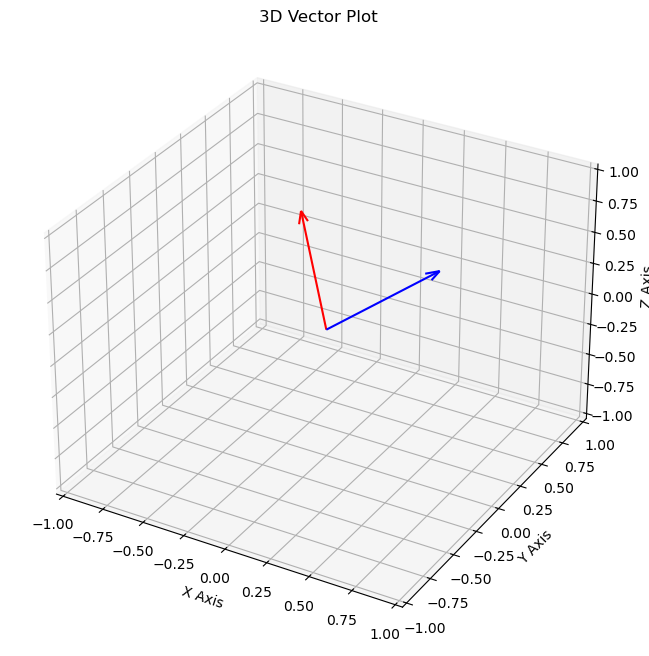

In [114]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Find Orthogonal Basis

In [115]:
p = projection(datum_2, datum_1)

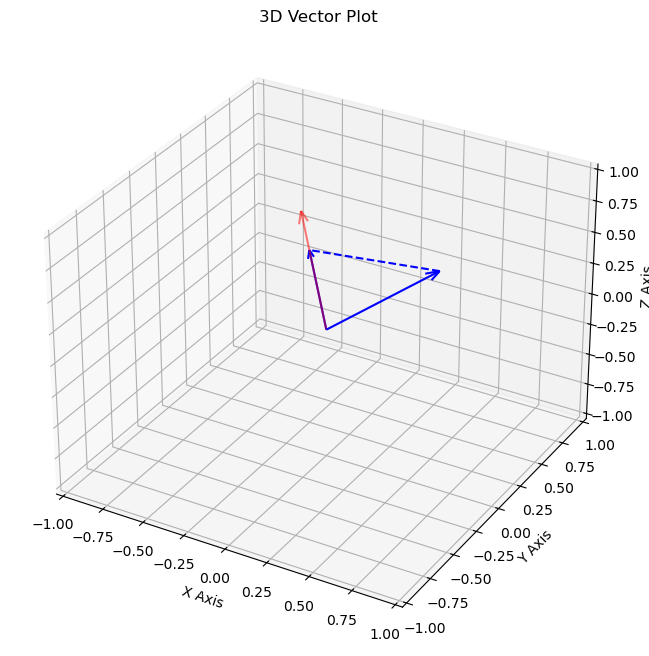

In [116]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1, alpha=0.5)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p, color='b', arrow_length_ratio=0.1)

ax.plot3D(*zip(datum_2, p), color="b", linestyle='dashed')


# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

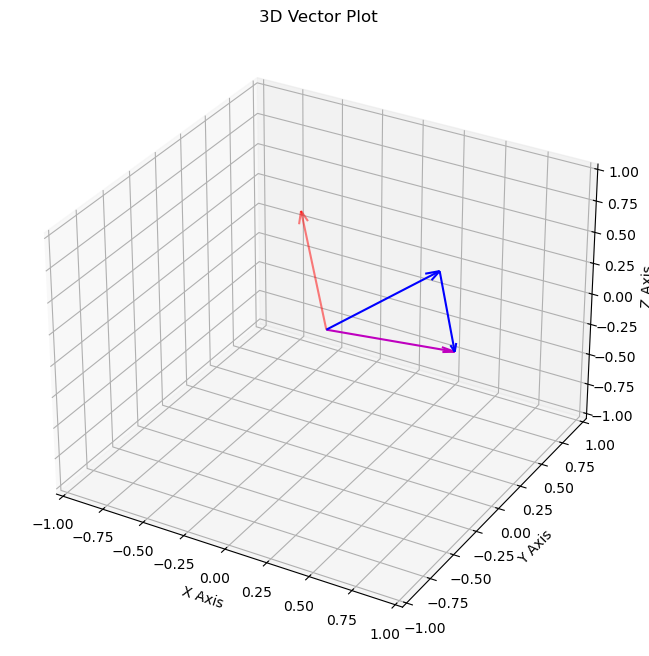

In [117]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1, color='r', arrow_length_ratio=0.1, alpha=0.5)
ax.quiver(0, 0, 0, *datum_2, color='b', arrow_length_ratio=0.1)
ax.quiver(*datum_2, *-p, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *(datum_2-p), color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [85]:
datum_1_basis = datum_1
datum_2_basis = gram_schmidt(datum_1, datum_2)

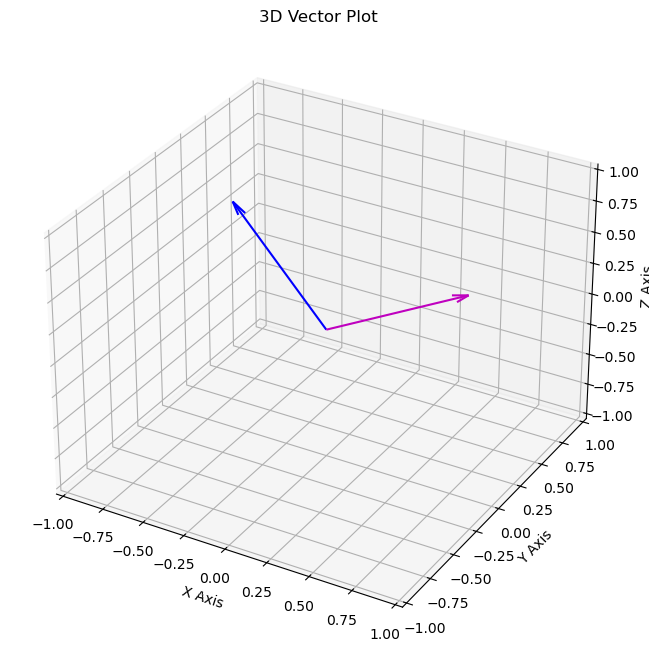

In [118]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

## Get more data

In [119]:
vec = []
for i in tqdm(range(20)):
    entry = get_unit_vector(get_accelerometer_data())
    vec.append(entry)
    
vec = np.mean(vec, axis=0)

100%|██████████| 20/20 [00:09<00:00,  2.07it/s]


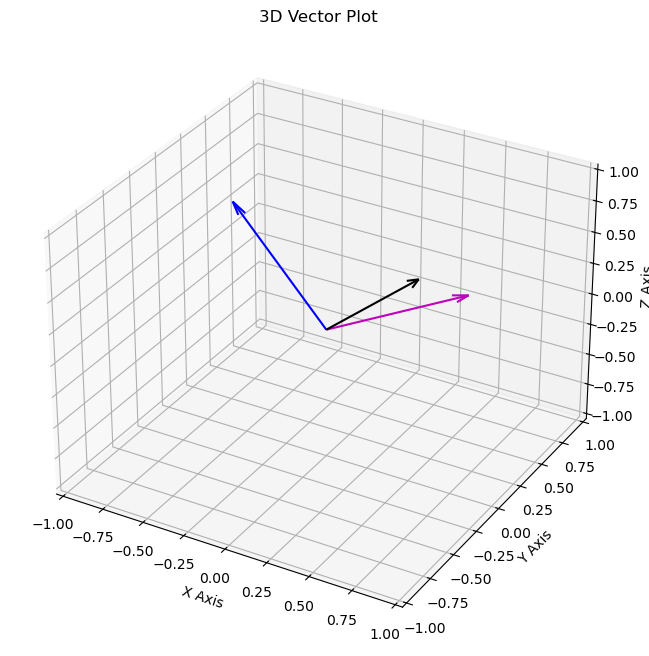

In [120]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [121]:
p1 = projection(vec, datum_1_basis)
p2 = projection(vec, datum_2_basis)

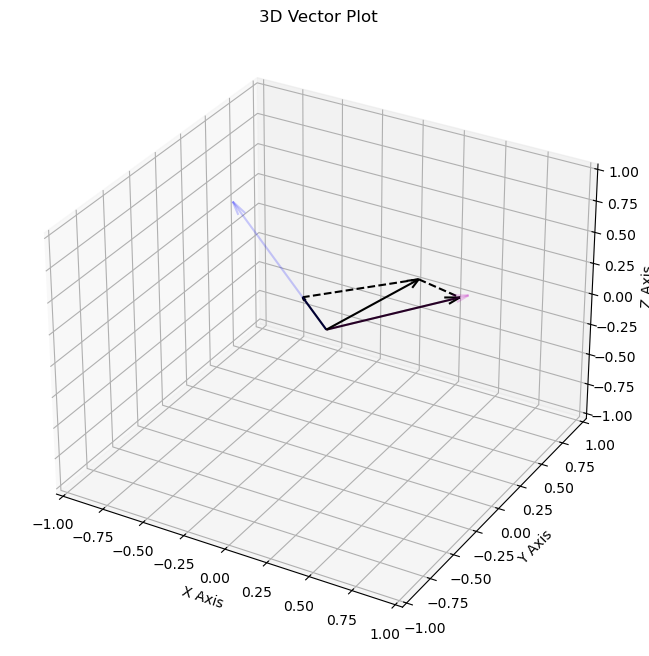

In [122]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *vec, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p1, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p2, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(vec, p1), color="k", linestyle='dashed')
ax.plot3D(*zip(vec, p2), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

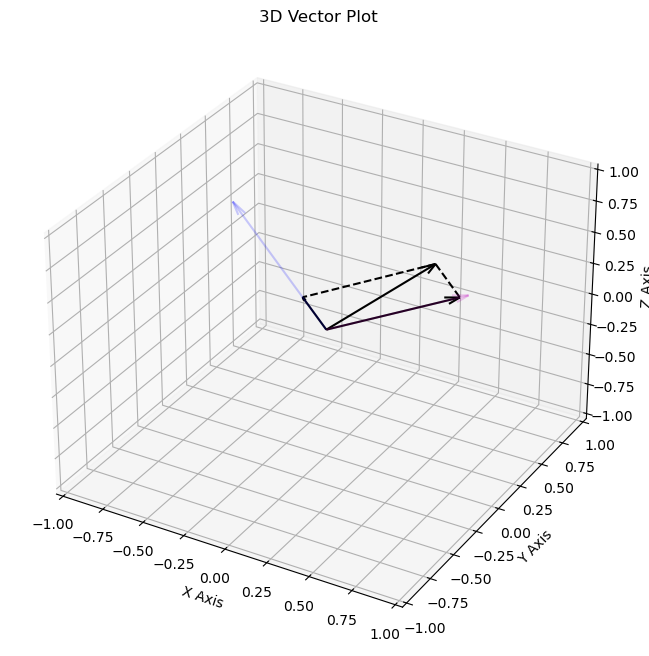

In [123]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(111, projection='3d')

ax.quiver(0, 0, 0, *datum_1_basis, color='b', arrow_length_ratio=0.1, alpha=0.2)
ax.quiver(0, 0, 0, *datum_2_basis, color='m', arrow_length_ratio=0.1, alpha=0.2)

ax.quiver(0, 0, 0, *(p1+p2), color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p1, color='k', arrow_length_ratio=0.1)
ax.quiver(0, 0, 0, *p2, color='k', arrow_length_ratio=0.1)

ax.plot3D(*zip(p1+p2, p1), color="k", linestyle='dashed')
ax.plot3D(*zip(p1+p2, p2), color="k", linestyle='dashed')

# Set limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Labels
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.set_zlabel('Z Axis')
ax.set_title('3D Vector Plot')

plt.show()

In [124]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    vec_basis = get_unit_vector(projection(vec, datum_1_basis) + projection(vec, datum_2_basis))
    
    print(f"angle = {to_degree(get_angle_btwn_vecs(vec_basis, datum_1_basis))}")
    

angle = 71.0607209934681
angle = 60.310506221714576
angle = 54.51560538279676
angle = 55.60901929852789
angle = 55.97896178265775
angle = 55.47360454299554
angle = 36.516359497260765
angle = 37.36795571626114
angle = 23.45944932798228
angle = 13.965534209177727
angle = 5.462518683250782
angle = 8.367604020934184
angle = 32.326252814469804
angle = 31.54286927699772
angle = 48.025645452166856
angle = 31.33006530349164
angle = 37.99795244861113
angle = 24.852538780870344
angle = 26.91535917600463
angle = 29.177915425741777
angle = 39.88316347489174
angle = 57.850435233607676
angle = 67.44183541240626
angle = 39.39870615658071
angle = 23.35583024843242
angle = 26.956906535700266
angle = 19.382352879042674
angle = 118.03944368372582
angle = 28.597916548651327
angle = 28.830373480739723
angle = 29.641919482976203
angle = 27.92405121192309
angle = 31.387046153317645
angle = 25.97058572358052
angle = 21.884179685000312
angle = 14.989166351731507
angle = 25.34085969033726
angle = 28.72892831823

In [127]:
for i in range(50):
    vec = get_unit_vector(get_accelerometer_data())
    vec_basis = get_unit_vector(projection(vec, datum_1_basis) + projection(vec, datum_2_basis))
    
    print(f"angle = {to_degree(get_angle_btwn_vecs(vec_basis, datum_1_basis)) * np.sign(np.dot(vec_basis, datum_2_basis))}")

angle = 28.303478453432483
angle = 27.847548362290578
angle = 28.541708264262855
angle = 30.181379470461344
angle = 38.05161888333389
angle = 37.33745184929273
angle = 14.359599459312342
angle = 15.042574154786603
angle = 13.988540715548496
angle = 12.181884489211228
angle = 27.09194276989443
angle = 29.429228508427816
angle = 29.929998280139458
angle = 31.194785473549388
angle = 20.60666396164973
angle = 19.83296534730698
angle = 20.95585427615434
angle = 31.420777247667882
angle = 34.15741390082708
angle = 49.61560013668288
angle = 66.2889271986011
angle = 60.36774750157903
angle = 46.16291120673671
angle = 39.473819501711155
angle = 39.10877720803073
angle = 40.673694053165526
angle = 29.40556776355943
angle = 30.517903826827748
angle = 30.36805990989247
angle = 45.312753825781776
angle = 41.323018810926065
angle = 17.159453050863164
angle = 10.521695652610436
angle = 5.334953299368233
angle = -14.400498151093899
angle = -15.362340220254676
angle = -13.657379579650135
angle = 6.3121